#Import Library

In [ ]:
import numpy as np
import os
import sys
import cv2
import h5py
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt

#Connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download the required dataset from the link below and create a folder with name 'Holiday_items' and upload the dataset (zip format)

https://www.hackerearth.com/challenges/competitive/hackerearth-deep-learning-challenge-holidays/problems/

In [ ]:
# Unzip contents
!unzip '14feeca248c811eb.zip'

In [ ]:
# Remove the zip files from the google drive
!rm '14feeca248c811eb.zip'

Change the directory to dataset folder

In [ ]:
main_folder='/content/drive/My Drive/Holiday_items/dataset'
os.chdir(main_folder)

# Convert images to h5 format for easy loading into ram memory

In [ ]:
# Path of train and test fodlers
train_path=os.path.join(main_folder,'train')
test_path=os.path.join(main_folder,'test')

In [ ]:
# Read the dataframe and list all unique classes
df=pd.read_csv('train.csv')

# Shuffle dataframe
df=df.sample(frac=1).reset_index(drop=True)
n_names=list(df['Class'].unique())
print(n_names)

['Miscellaneous', 'Christmas_Tree', 'Jacket', 'Snowman', 'Candle', 'Airplane']

In [ ]:
# Create training dataset in h5 format
dataset_path=os.path.join(main_folder,'holiday.h5')
if os.path.exists(dataset_path):
    os.remove(dataset_path)


In [ ]:
with h5py.File(dataset_path,'a') as f:
    # Create groups
    f.create_dataset('image',(len(df),224*224*3))
    f.create_dataset('label',(len(df),))

    for i, idx in enumerate(range(len(df))):
        img_path=os.path.join(main_folder,'train',df.loc[idx]['Image'])
        class_id=n_names.index(df.loc[idx]['Class'])

        img=cv2.imread(img_path)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(224,224),interpolation=cv2.INTER_CUBIC)/255.0

        img=img.ravel()

        f['image'][i,...]=img[None]
        f['label'][i,...]=class_id

        sys.stdout.flush()
        sys.stdout.write('\rIdx:%d'%i)
f.close()

# Save all class names in order that was used to create labels
with open('name.json','w') as f:
    json.dump({'names':n_names},f)
f.close()


Idx:6468

In [ ]:
# Create test dataset
dataset_path=os.path.join(main_folder,'holiday_test.h5')
if os.path.exists(dataset_path):
    os.remove(dataset_path)

files=glob.glob('/content/drive/My Drive/Holiday_items/dataset/test/*.jpg')

with h5py.File(dataset_path,'a') as f:
    f.create_dataset('image',(len(files),224*224*3))


    for i, img_path in enumerate(files):
        
 
        img=cv2.imread(img_path)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(224,224),interpolation=cv2.INTER_CUBIC)/255.0

        img=img.ravel()

        f['image'][i,...]=img[None]

        sys.stdout.flush()
        sys.stdout.write('\rIdx:%d'%i)


# save all image names. Will be used while submission
with open('test_img_names.json','w') as f:
    json.dump({'test':files},f)
f.close()

Idx:3488

# Reading written data

In [ ]:
# Read h5 datasets

holiday=os.path.join(main_folder,'holiday.h5')

with h5py.File(holiday,'r') as f:
    print(list(f.keys()))

    x=f['image'][:]
    y=f['label'][:]

print(f' x shape {x.shape}  y shape {y.shape}')

['image', 'label']
 x shape (10, 150528)  y shape (10,)


In [ ]:
with open('name.json','r') as f:
    names=json.load(f)

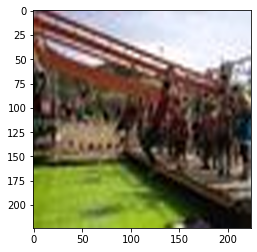

In [ ]:
plt.imshow(x[0].reshape(224,224,3));
plt.title(labels[0])

#  **ALL SET FOR NEXT STEPS**